In [1]:
%matplotlib inline


In [2]:
import pandas as pd

### Reading all students list

In [3]:
students = pd.read_csv("../BlinkLists/CSE255FinalList.tsv",sep="\t",usecols=["pid","name","email"])
students['pid'] = students['pid'].map(lambda x: x.upper().strip())

In [4]:
students["Last Name"] = students['name'].map(lambda x: x.split(",")[0].strip())
students["First Name"] = students['name'].map(lambda x: x.split(",")[-1].strip())

### Reading final

In [5]:
final = pd.read_csv("CSE255/Final_cse.csv",usecols=["pid","grade"])
final['pid'] = final['pid'].map(lambda x: x.upper().strip())

In [6]:
final = final.merge(students,on="pid")

### Reading all Homework submissions

In [7]:
course = "cse"
hw_list = ["CSE255/"+"HW" + str(i) + "_graded_" + course + ".csv" for i in range(1,6) ]

In [8]:
grades = pd.DataFrame()

In [9]:
for hw in hw_list:
    df = pd.read_csv(hw,usecols=['pid','homework','grade'])
    grades = pd.concat([grades,df],ignore_index=True)

### Taking best 4 Homework submissions

In [10]:
best4=grades.groupby(by="pid")['grade'].nlargest(4).reset_index()
best4 = best4.drop(labels="level_1",axis=1).groupby(by="pid").sum().reset_index()
best4.columns = ["pid","hw_total"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109006850>]], dtype=object)

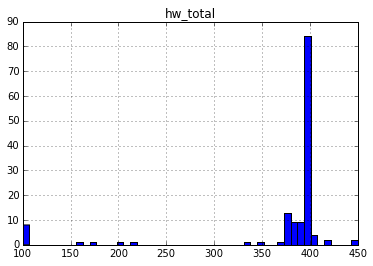

In [11]:
best4.hist(bins=50)

In [12]:
best4['hw_total(70%)'] = best4['hw_total']/400*70

### Concatenating final results and homeworks

In [13]:
final_grades = final.merge(best4,on="pid")

In [14]:
final_grades["final(30%)"] = final_grades['grade'] / 80 * 30

In [15]:
final_grades.drop('grade',axis=1,inplace=True)

In [16]:
final_grades["Total"] = final_grades["final(30%)"]  + final_grades['hw_total(70%)']

In [17]:
all_hws = pd.pivot(grades['pid'],grades['homework'],grades['grade']).reset_index()

/Users/yoavfreund/anaconda/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


In [18]:
final_grades.rename(columns={"pid":"Student ID"},inplace=True)

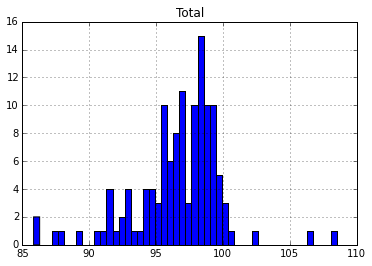

In [23]:
final_grades.hist("Total",bins=50);

In [21]:
final_grades.sort(columns='Total')

/Users/yoavfreund/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Student ID,name,email,Last Name,First Name,hw_total,hw_total(70%),final(30%),Total
113,A53095324,"Ang, Shen Ting",s3ang@ucsd.edu,Ang,Shen Ting,347,60.725,25.12500,85.85000
101,A53100200,"Jia, Yicong",yij071@ucsd.edu,Jia,Yicong,335,58.625,27.61875,86.24375
54,A53097687,"Majumdar, Abhishek",abmajumd@ucsd.edu,Majumdar,Abhishek,375,65.625,21.90000,87.52500
111,A53102484,"Chae, Moojin",mochae@ucsd.edu,Chae,Moojin,374,65.450,22.27500,87.72500
77,A53093725,"Bommi Reddy, Puneeth",pbommire@ucsd.edu,Bommi Reddy,Puneeth,376,65.800,23.62500,89.42500
66,A10726357,"Lu, Zeyun",zelu@ucsd.edu,Lu,Zeyun,400,70.000,20.49375,90.49375
112,A53100492,"Shi, Yiwen",yis018@ucsd.edu,Shi,Yiwen,385,67.375,23.86875,91.24375
41,A53104909,"Jin, Xiaojian",xij049@ucsd.edu,Jin,Xiaojian,381,66.675,24.61875,91.29375
26,A10052401,"Lu, Frankie",frlu@ucsd.edu,Lu,Frankie,380,66.500,24.90000,91.40000
63,A53101200,"Zhou, Kai",kaz040@ucsd.edu,Zhou,Kai,373,65.275,26.25000,91.52500


In [31]:
Cutoffs=[(105,'A+'),
         (95,'A'),
         (88,'A-'),
         (83,'B+'),
         (75,'B')]
Cutoffs

[(105, 'A+'), (95, 'A'), (88, 'A-'), (83, 'B+'), (75, 'B')]

In [32]:
def letter_grade(score):
    for cut,letter in Cutoffs:
        if score>=cut:
            return letter
    return None

In [33]:
Letter_Grades=[letter_grade(score) for score in list(final_grades['Total'])]
final_grades['Letter_Grade']=Letter_Grades
final_grades.sort(columns='Total')

/Users/yoavfreund/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Student ID,name,email,Last Name,First Name,hw_total,hw_total(70%),final(30%),Total,Letter_Grade
113,A53095324,"Ang, Shen Ting",s3ang@ucsd.edu,Ang,Shen Ting,347,60.725,25.12500,85.85000,B+
101,A53100200,"Jia, Yicong",yij071@ucsd.edu,Jia,Yicong,335,58.625,27.61875,86.24375,B+
54,A53097687,"Majumdar, Abhishek",abmajumd@ucsd.edu,Majumdar,Abhishek,375,65.625,21.90000,87.52500,B+
111,A53102484,"Chae, Moojin",mochae@ucsd.edu,Chae,Moojin,374,65.450,22.27500,87.72500,B+
77,A53093725,"Bommi Reddy, Puneeth",pbommire@ucsd.edu,Bommi Reddy,Puneeth,376,65.800,23.62500,89.42500,A-
66,A10726357,"Lu, Zeyun",zelu@ucsd.edu,Lu,Zeyun,400,70.000,20.49375,90.49375,A-
112,A53100492,"Shi, Yiwen",yis018@ucsd.edu,Shi,Yiwen,385,67.375,23.86875,91.24375,A-
41,A53104909,"Jin, Xiaojian",xij049@ucsd.edu,Jin,Xiaojian,381,66.675,24.61875,91.29375,A-
26,A10052401,"Lu, Frankie",frlu@ucsd.edu,Lu,Frankie,380,66.500,24.90000,91.40000,A-
63,A53101200,"Zhou, Kai",kaz040@ucsd.edu,Zhou,Kai,373,65.275,26.25000,91.52500,A-


In [35]:
final_grades.columns

Index([u'Student ID', u'name', u'email', u'Last Name', u'First Name',
       u'hw_total', u'hw_total(70%)', u'final(30%)', u'Total', u'Letter_Grade',
       u'SectionId'],
      dtype='object')

In [41]:
CSE255_SectionID='867447'
final_grades['SectionId']=CSE255_SectionID
df_columns=[u'Last Name', u'First Name', u'Student ID','SectionId',u'Letter_Grade']
egrade_columns=['Last Name','First Name','Student ID','SectionId','Final_Assigned_Egrade']

eGrades=pd.DataFrame()
for old,new in zip(df_columns,egrade_columns):
    eGrades[new]=final_grades[old]
eGrades

,Last Name,First Name,Student ID,SectionId,Final_Assigned_Egrade
0,Avireddy,Srinivas,A53101356,867447,A
1,Rangi,Anshuka,A53099813,867447,A
2,Rajesh,Shanmathi,A53088789,867447,A-
3,Gadgil,Mitesh Ashutosh,A53095373,867447,A
4,Weggersen,Benjamin,U06990406,867447,A
5,Ijeri,Sanmitra,A53105054,867447,A
6,Velaga,Sampath Krishna,A53103630,867447,A
7,Kodaikkal Vijayan,Sidharth,A53101352,867447,A-
8,Baratam,Chaitanya,A53104872,867447,A
9,Garg,Abhinav,A53095668,867447,A


In [50]:
for PID in SU_Students:
    eGrades.loc[eGrades['Student ID']==PID,'Final_Assigned_Egrade']='S'

eGrades

,Last Name,First Name,Student ID,SectionId,Final_Assigned_Egrade
0,Avireddy,Srinivas,A53101356,867447,A
1,Rangi,Anshuka,A53099813,867447,A
2,Rajesh,Shanmathi,A53088789,867447,A-
3,Gadgil,Mitesh Ashutosh,A53095373,867447,A
4,Weggersen,Benjamin,U06990406,867447,A
5,Ijeri,Sanmitra,A53105054,867447,A
6,Velaga,Sampath Krishna,A53103630,867447,A
7,Kodaikkal Vijayan,Sidharth,A53101352,867447,A-
8,Baratam,Chaitanya,A53104872,867447,A
9,Garg,Abhinav,A53095668,867447,A


In [51]:
eGrades.to_csv('CSE255_eGrades.csv',index=None)

In [52]:
!cat CSE255_eGrades.csv

Last Name,First Name,Student ID,SectionId,Final_Assigned_Egrade
Avireddy,Srinivas,A53101356,867447,A
Rangi,Anshuka,A53099813,867447,A
Rajesh,Shanmathi,A53088789,867447,A-
Gadgil,Mitesh Ashutosh,A53095373,867447,A
Weggersen,Benjamin,U06990406,867447,A
Ijeri,Sanmitra,A53105054,867447,A
Velaga,Sampath Krishna,A53103630,867447,A
Kodaikkal Vijayan,Sidharth,A53101352,867447,A-
Baratam,Chaitanya,A53104872,867447,A
Garg,Abhinav,A53095668,867447,A
Xu,Zihan,A53044451,867447,A
Karanth,Rakesh Ganapathi,A53093242,867447,A
Marupaka,Phani Teja,A53087859,867447,A
Zhou,Zhimin,A53089795,867447,A
Pan,Zhengren,A53102894,867447,A
Tripathy,Abhijit,A53095669,867447,A
Ji,Shengnan,A53089609,867447,A
Malik,Shrestha,A53087000,867447,A
Menon,Manghat Nitish,A53097652,867447,A-
Srivastava,Nikhil,A53102323,867447,A
Pathre Balakrishna,Shreyas,A53096479,867447,A-
Singh,Ankit,A53097552,867447,A
Ganguly,Shouvik,A53043486,867447,A
Wadhwa,Rakshit,A53100056,867447,A
Lokesh,Vikas,A53102223,867447,A
Sakaray,Vikas,A53090014,8

In [44]:
!grep A53090311 CSE255_eGrades.csv

Aduri,Venkata Satya Sri Harsha,A53090311,867447,A


In [45]:
SU_Students=['A53104909','A09229555','A53087777','A53102444']

In [58]:
!grep -i yilin CSE255/*.csv

In [ ]:
!ls -l 